In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier,cv,Pool
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


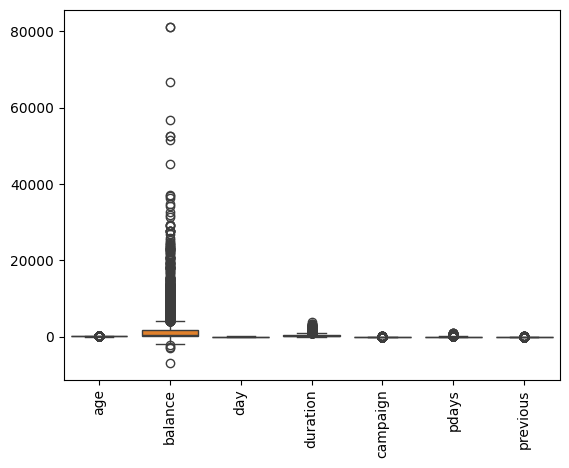

In [ ]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11162 entries, 0 to 11161
Series name: age
Non-Null Count  Dtype
--------------  -----
11162 non-null  int64
dtypes: int64(1)
memory usage: 87.3 KB


# The most existing age group

In [ ]:
df["age"].value_counts().head(15)

age
31    496
32    477
34    466
33    464
35    461
30    456
36    432
37    370
38    353
39    343
29    328
40    326
41    299
42    295
28    292
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

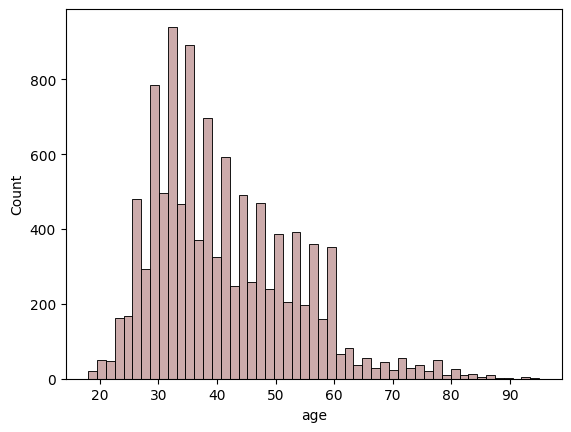

In [ ]:
sns.histplot(x="age",data=df ,color = 'rosybrown')

# types of jobs

In [ ]:
df["job"].describe()

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object

In [ ]:
df["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

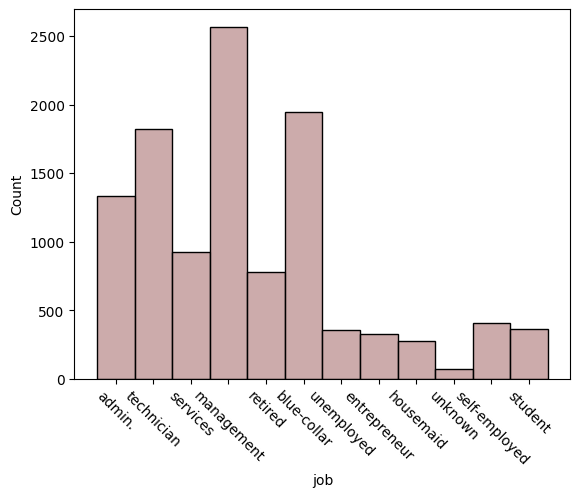

In [ ]:
sns.histplot(x="job", data=df, color='rosybrown')
plt.xticks(rotation=-45)
plt.show()

In [ ]:
fig = px.pie(df, values=np.ones(11162), names='job', title='job',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()


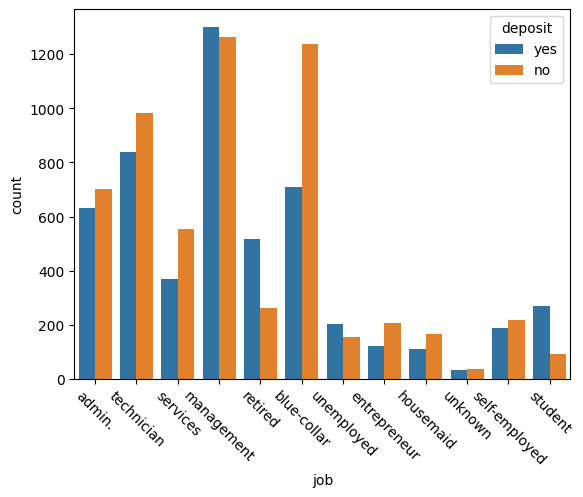

In [ ]:
sns.countplot(x="job", data=df, hue="deposit")
plt.xticks(rotation=-45)
plt.show()

<Axes: xlabel='marital', ylabel='count'>

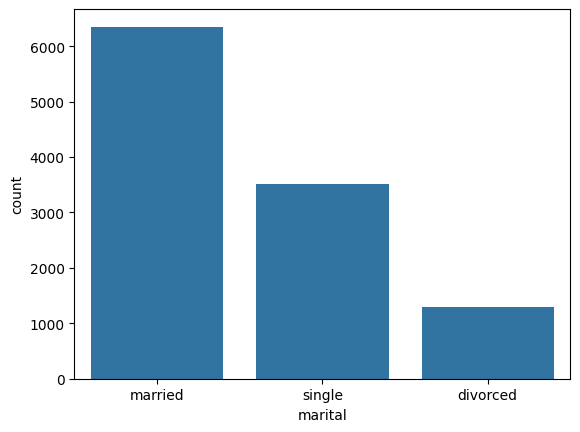

In [ ]:
sns.countplot(x="marital", data=df)

In [ ]:
fig = px.pie(df, values=np.ones(11162), names='marital', title='marital',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()


<Axes: xlabel='marital', ylabel='count'>

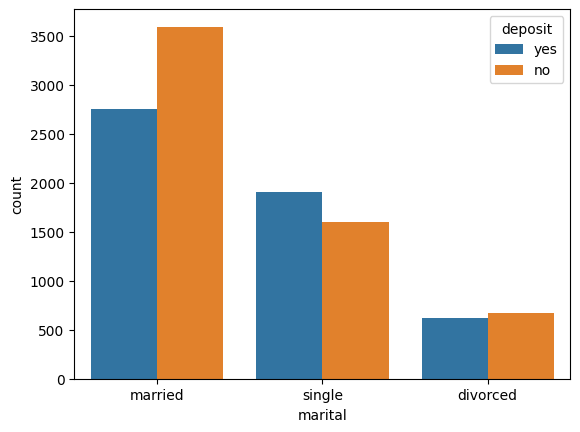

In [ ]:
sns.countplot(x="marital", data=df, hue="deposit")

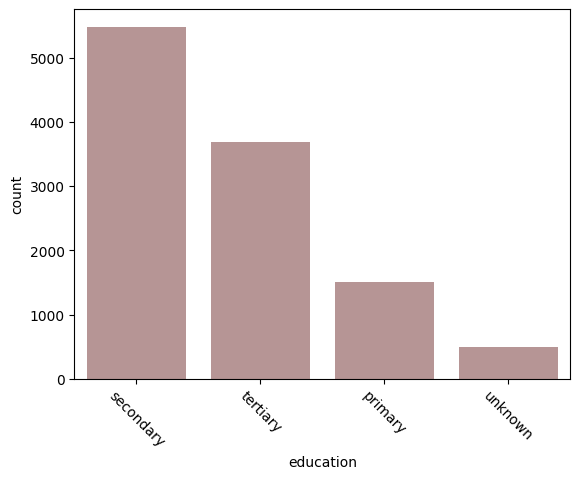

In [ ]:
sns.countplot(x="education", data=df, color='rosybrown')
plt.xticks(rotation=-45)
plt.show()

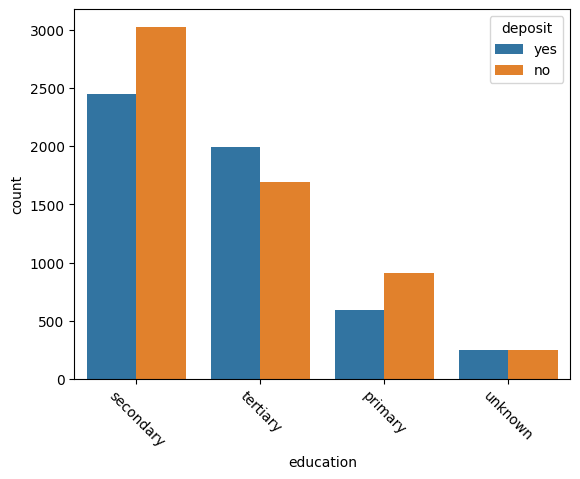

In [ ]:
sns.countplot(x="education", data=df, hue="deposit")
plt.xticks(rotation=-45)
plt.show()

In [ ]:
fig = px.pie(df, values=np.ones(11162), names='education', title='education',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

In [ ]:
df["default"].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

<Axes: xlabel='default', ylabel='count'>

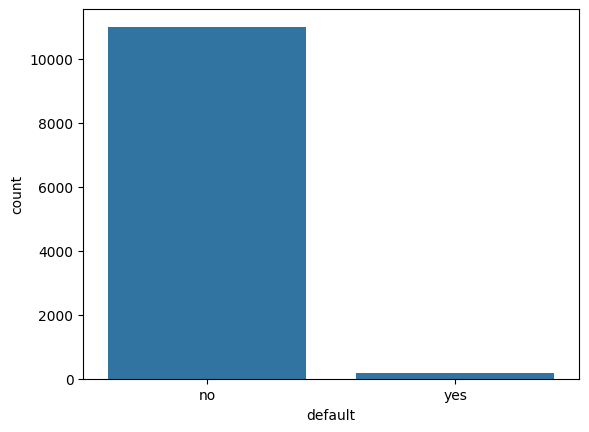

In [ ]:
sns.countplot(x="default", data=df)

<Axes: xlabel='default', ylabel='count'>

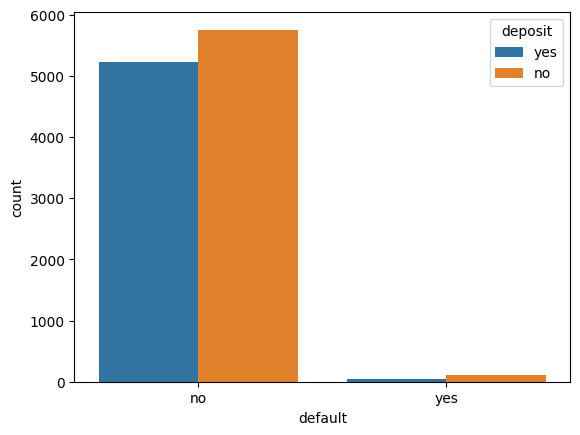

In [ ]:
sns.countplot(x="default", data=df, hue="deposit")

In [ ]:
fig = px.pie(df, values=np.ones(11162), names='default', title='default',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

In [ ]:
df["balance"].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

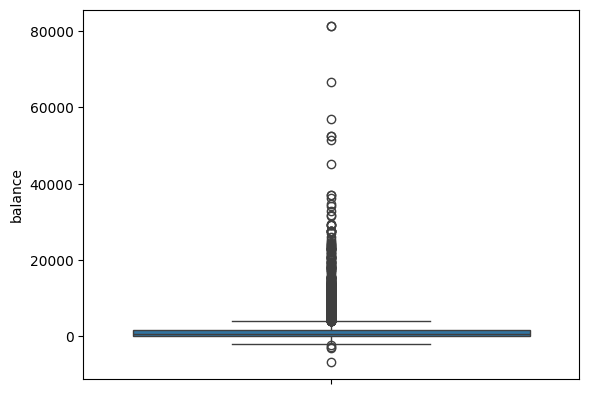

In [ ]:
sns.boxplot(y="balance",data=df)

In [ ]:
df.loc[df["balance"] > 40000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2468,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
3236,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,15,feb,394,3,189,1,success,yes
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes
4210,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
8208,52,blue-collar,married,primary,no,66653,no,no,cellular,14,aug,109,3,-1,0,unknown,no
10143,43,admin.,single,secondary,no,56831,no,no,unknown,15,may,243,1,-1,0,unknown,no
10585,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,jul,325,1,-1,0,unknown,no


In [ ]:
df.drop(df[df["balance"] > 40000].index, inplace=True)

<Axes: xlabel='balance', ylabel='Density'>

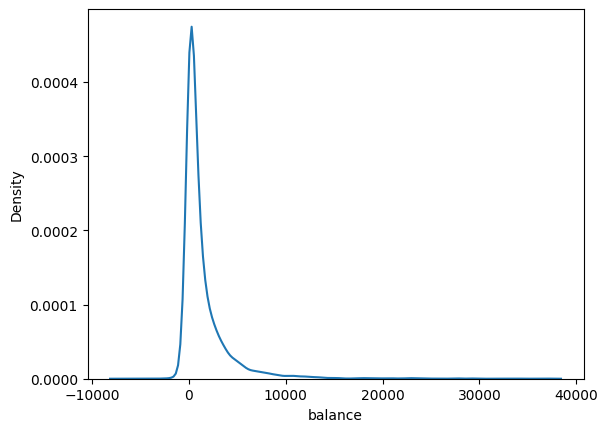

In [ ]:
sns.kdeplot(x="balance",data =df)

<Axes: xlabel='balance', ylabel='Density'>

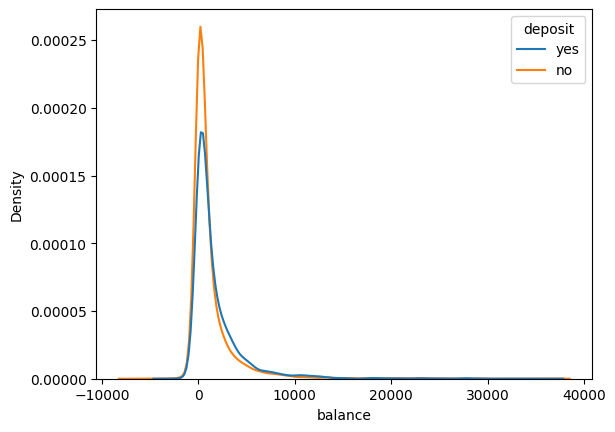

In [ ]:
sns.kdeplot(x="balance",data =df,hue="deposit")

In [ ]:
df["housing"].value_counts()

housing
no     5874
yes    5280
Name: count, dtype: int64

<Axes: xlabel='housing', ylabel='count'>

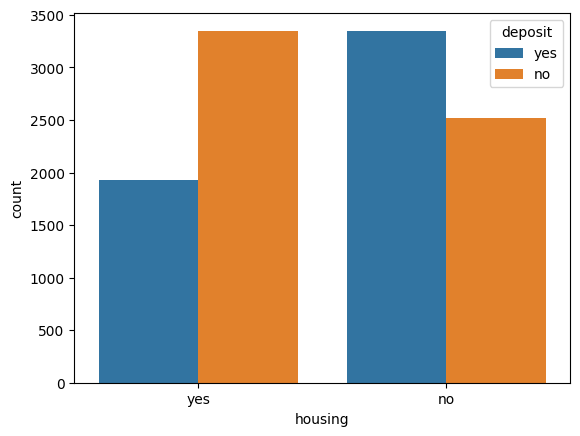

In [ ]:
sns.countplot(x="housing", data=df, hue="deposit")

In [ ]:
fig = px.pie(df, values=np.ones(11154), names='housing', title='housing',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
df['loan'].value_counts()

loan
no     9695
yes    1459
Name: count, dtype: int64

<Axes: xlabel='loan', ylabel='count'>

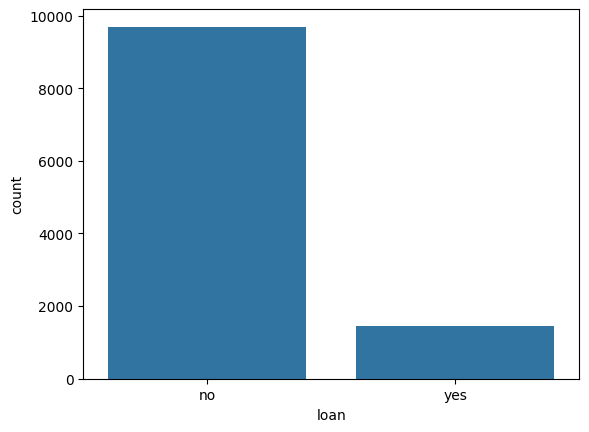

In [ ]:
sns.countplot(x="loan", data=df)

<Axes: xlabel='loan', ylabel='count'>

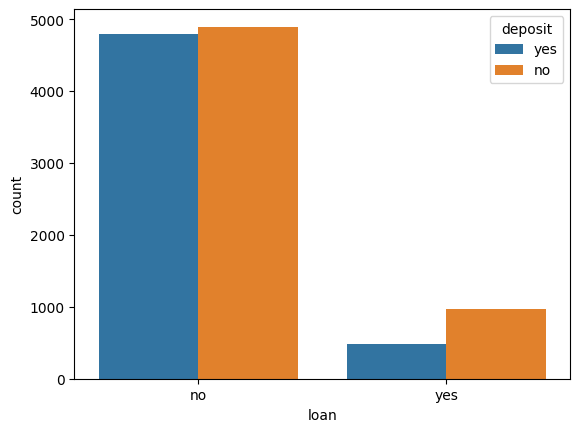

In [ ]:
sns.countplot(x="loan", data=df, hue="deposit")

In [ ]:
df["duration"].info()

<class 'pandas.core.series.Series'>
Index: 11154 entries, 0 to 11161
Series name: duration
Non-Null Count  Dtype
--------------  -----
11154 non-null  int64
dtypes: int64(1)
memory usage: 174.3 KB


In [ ]:
df["duration"].describe()

count    11154.000000
mean       371.897257
std        347.026223
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

<Axes: xlabel='duration', ylabel='Density'>

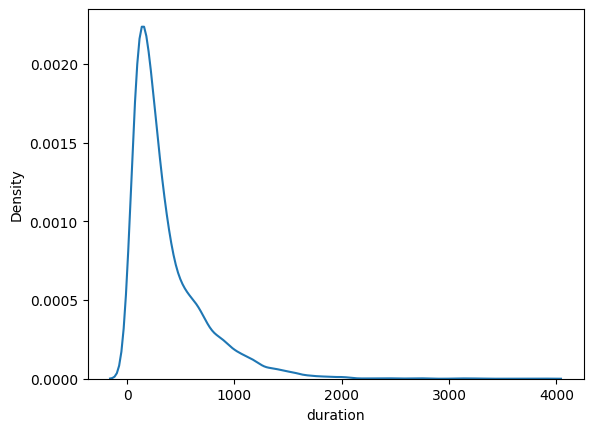

In [ ]:
sns.kdeplot(x="duration",data =df)

<Axes: xlabel='duration', ylabel='Density'>

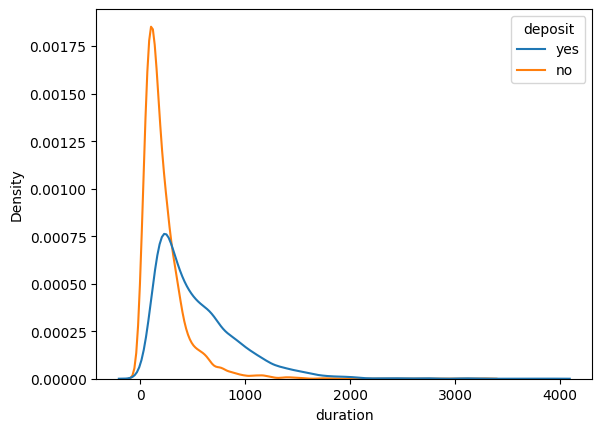

In [ ]:
sns.kdeplot(x="duration",data =df,hue ="deposit")

In [ ]:
df["campaign"].info()

<class 'pandas.core.series.Series'>
Index: 11154 entries, 0 to 11161
Series name: campaign
Non-Null Count  Dtype
--------------  -----
11154 non-null  int64
dtypes: int64(1)
memory usage: 174.3 KB


In [ ]:
df["campaign"].value_counts()

campaign
1     4792
2     3028
3     1319
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: count, dtype: int64

<Axes: xlabel='campaign', ylabel='Density'>

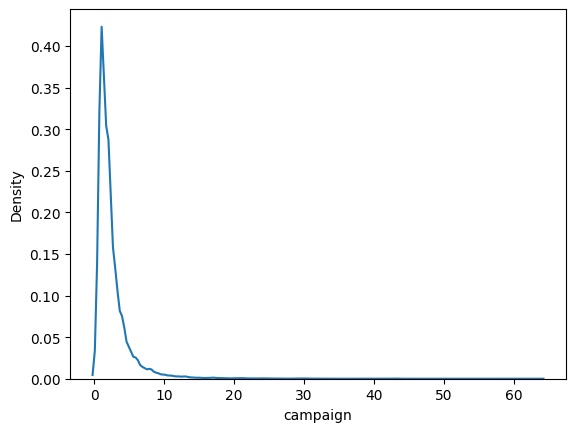

In [ ]:
sns.kdeplot(data=df,x="campaign")

<Axes: xlabel='campaign', ylabel='Density'>

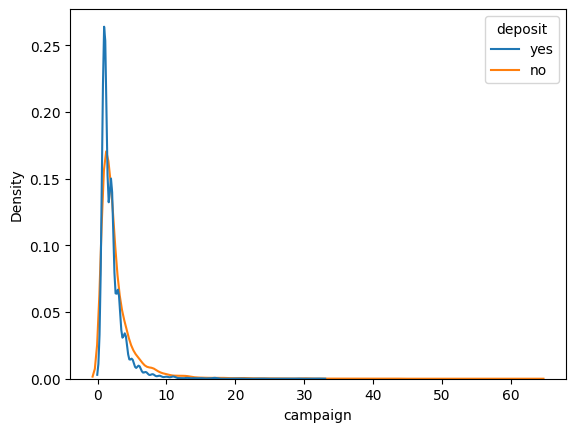

In [ ]:
sns.kdeplot(data=df,x="campaign",hue="deposit")

In [ ]:
df["poutcome"].info()

<class 'pandas.core.series.Series'>
Index: 11154 entries, 0 to 11161
Series name: poutcome
Non-Null Count  Dtype 
--------------  ----- 
11154 non-null  object
dtypes: object(1)
memory usage: 174.3+ KB


In [ ]:
df["poutcome"].describe()

count       11154
unique          4
top       unknown
freq         8321
Name: poutcome, dtype: object

In [ ]:
df["poutcome"].value_counts()

poutcome
unknown    8321
failure    1228
success    1069
other       536
Name: count, dtype: int64

<Axes: xlabel='poutcome', ylabel='count'>

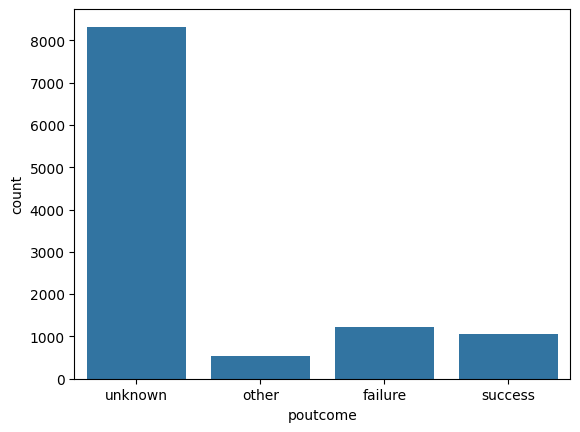

In [ ]:
sns.countplot(x="poutcome", data=df)

In [ ]:
fig = px.pie(df, values=np.ones(11154), names='poutcome', title='poutcome',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

<Axes: xlabel='poutcome', ylabel='count'>

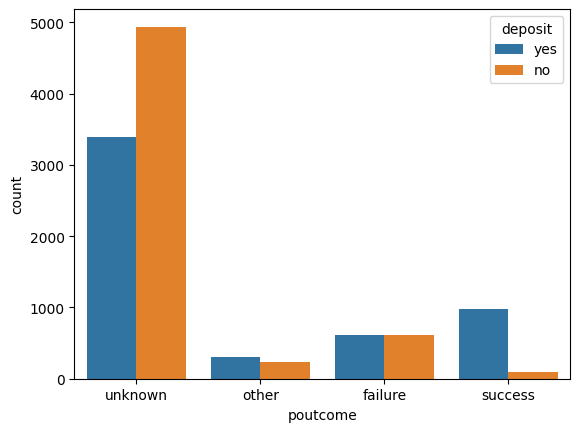

In [ ]:
sns.countplot(x="poutcome", data=df, hue="deposit")

In [ ]:
df['deposit'].info()

<class 'pandas.core.series.Series'>
Index: 11154 entries, 0 to 11161
Series name: deposit
Non-Null Count  Dtype 
--------------  ----- 
11154 non-null  object
dtypes: object(1)
memory usage: 174.3+ KB


In [ ]:
df['deposit'].describe()

count     11154
unique        2
top          no
freq       5870
Name: deposit, dtype: object

In [ ]:
df['deposit'].value_counts()

deposit
no     5870
yes    5284
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='count'>

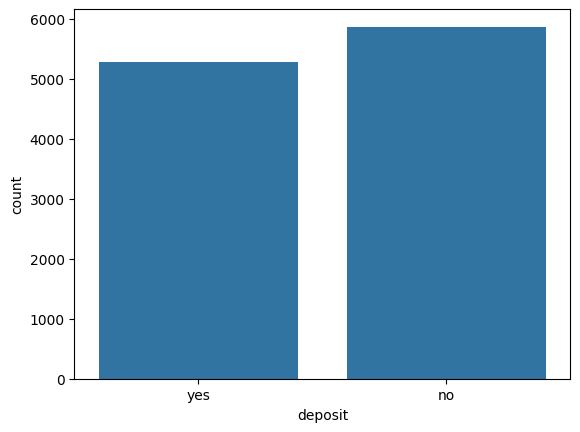

In [ ]:
sns.countplot(data=df ,x="deposit")

In [ ]:
fig = px.pie(df, values=np.ones(11154), names='deposit', title='deposit',color_discrete_sequence=px.colors.sequential.Brwnyl)
fig.show()

# Preprocessing

In [ ]:
df.isnull().sum()/df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11154 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11154 non-null  int64 
 1   job        11154 non-null  object
 2   marital    11154 non-null  object
 3   education  11154 non-null  object
 4   default    11154 non-null  object
 5   balance    11154 non-null  int64 
 6   housing    11154 non-null  object
 7   loan       11154 non-null  object
 8   contact    11154 non-null  object
 9   day        11154 non-null  int64 
 10  month      11154 non-null  object
 11  duration   11154 non-null  int64 
 12  campaign   11154 non-null  int64 
 13  pdays      11154 non-null  int64 
 14  previous   11154 non-null  int64 
 15  poutcome   11154 non-null  object
 16  deposit    11154 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [ ]:
le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
x = df.drop([ 'contact', 'day', 'month','pdays','previous','deposit'],axis =1)

In [ ]:
y=df["deposit"]

In [ ]:
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,0,2343,1,0,1042,1,3
1,56,0,1,1,0,45,0,0,1467,1,3
2,41,9,1,1,0,1270,1,0,1389,1,3
3,55,7,1,1,0,2476,1,0,579,1,3
4,54,0,1,2,0,184,0,0,673,2,3
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,257,1,3
11158,39,7,1,1,0,733,0,0,83,4,3
11159,32,9,2,1,0,29,0,0,156,2,3
11160,43,9,1,1,0,0,0,1,9,2,0


In [ ]:
st = StandardScaler()

In [ ]:
x["balance"] = st.fit_transform(x[["balance"]])

In [ ]:
x["duration"] = st.fit_transform(x[["duration"]])

In [ ]:
x

,age,job,marital,education,default,balance,housing,loan,duration,campaign,poutcome
0,59,0,1,1,0,0.307815,1,0,1.931072,1,3
1,56,0,1,1,0,-0.517484,0,0,3.155819,1,3
2,41,9,1,1,0,-0.077540,1,0,2.931042,1,3
3,55,7,1,1,0,0.355580,1,0,0.596820,1,3
4,54,0,1,2,0,-0.467564,0,0,0.867705,2,3
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,-0.533286,1,0,-0.331106,1,3
11158,39,7,1,1,0,-0.270397,0,0,-0.832531,4,3
11159,32,9,2,1,0,-0.523230,0,0,-0.622163,2,3
11160,43,9,1,1,0,-0.533645,0,1,-1.045781,2,0


In [ ]:
x_train , x_test ,y_train ,y_test =train_test_split(x,y ,test_size=0.25 ,random_state= 42)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(11154, 11)
(8365, 11)
(2789, 11)


In [ ]:
def train_evaluate_model(model, x_train, y_train, x_test,y_test):

    model.fit(x_train, y_train)  #fit the model instance


    predictions = model.predict(x_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df


In [ ]:
lg = LogisticRegression(penalty ="l2" ,C=0.5)

results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

In [ ]:
results.index = ['LogisticRegression']

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.770886,0.747531,0.792959,0.707025,0.768399


In [ ]:
def train_evaluate_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create a dictionary to store the results
    results = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

    return pd.DataFrame(results, index=[model.__class__.__name__])


In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5, max_features=4)
decision_tree_results = train_evaluate_model(decision_tree, x_train, y_train, x_test, y_test)

In [ ]:
results = decision_tree_results.copy()
results.sort_values(by='f1_score', ascending=False, inplace=True)
styled_results = results.style.background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=13,metric="minkowski")

In [ ]:
knn_results = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn_results.index = ['KNearsNeighbors']


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,precision,recall,f1_score
DecisionTreeClassifier,0.723915,0.749123,0.638266,0.689266


In [ ]:
rfc = RandomForestClassifier(max_features=9, min_samples_split=4, n_estimators=91)

In [ ]:
rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

In [ ]:
results.sort_values(by='f1_score',
ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,precision,recall,f1_score
DecisionTreeClassifier,0.723915,0.749123,0.638266,0.689266


In [ ]:
xgboost = XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, x_train, y_train, x_test, y_test)
xgboost_result.index = ['XGBoost']

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,precision,recall,f1_score
DecisionTreeClassifier,0.723915,0.749123,0.638266,0.689266


In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, x_train, y_train, x_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']


In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,precision,recall,f1_score
DecisionTreeClassifier,0.723915,0.749123,0.638266,0.689266


In [ ]:
cb = CatBoostClassifier()
cb_result = train_evaluate_model(cb, x_train, y_train, x_test, y_test)
cb_result.index = ['catboost']

Learning rate set to 0.025517
0:	learn: 0.6783427	total: 71.3ms	remaining: 1m 11s
1:	learn: 0.6647135	total: 81.9ms	remaining: 40.9s
2:	learn: 0.6525067	total: 97.2ms	remaining: 32.3s
3:	learn: 0.6405808	total: 113ms	remaining: 28.2s
4:	learn: 0.6313771	total: 123ms	remaining: 24.5s
5:	learn: 0.6199332	total: 139ms	remaining: 23s
6:	learn: 0.6101727	total: 146ms	remaining: 20.7s
7:	learn: 0.6013914	total: 164ms	remaining: 20.4s
8:	learn: 0.5919629	total: 178ms	remaining: 19.6s
9:	learn: 0.5841140	total: 202ms	remaining: 20s
10:	learn: 0.5760978	total: 217ms	remaining: 19.5s
11:	learn: 0.5687855	total: 221ms	remaining: 18.2s
12:	learn: 0.5620143	total: 229ms	remaining: 17.4s
13:	learn: 0.5557410	total: 237ms	remaining: 16.7s
14:	learn: 0.5506530	total: 247ms	remaining: 16.2s
15:	learn: 0.5447840	total: 260ms	remaining: 16s
16:	learn: 0.5396219	total: 272ms	remaining: 15.7s
17:	learn: 0.5344762	total: 305ms	remaining: 16.6s
18:	learn: 0.5297148	total: 321ms	remaining: 16.6s
19:	learn: 0.

In [ ]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,precision,recall,f1_score
DecisionTreeClassifier,0.723915,0.749123,0.638266,0.689266


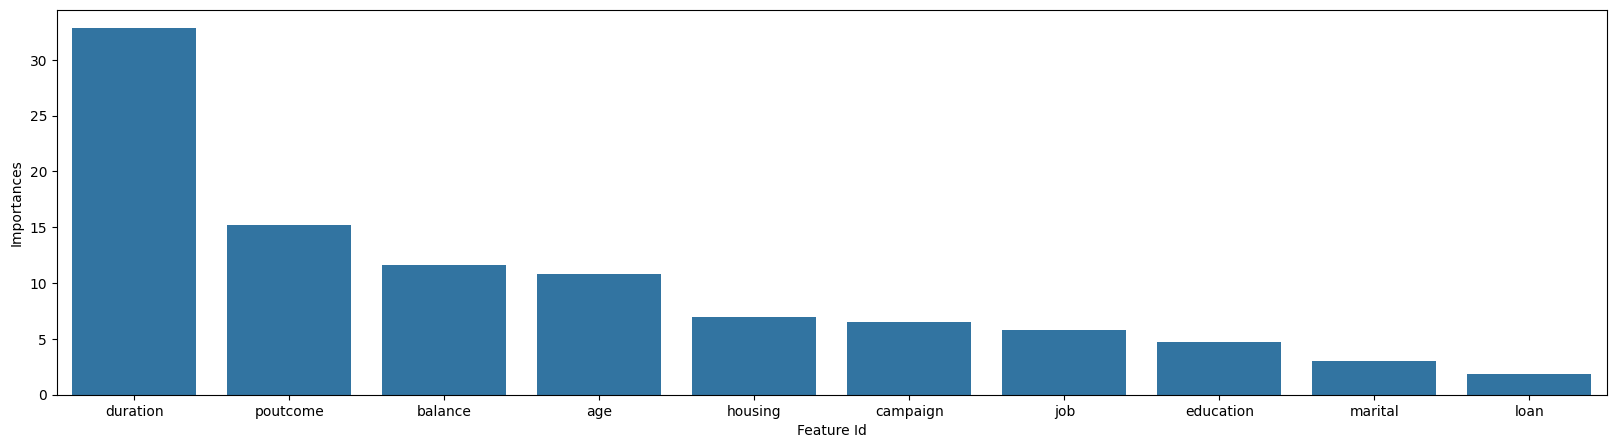

In [ ]:
plt.figure(figsize=(20,5))
fi=cb.get_feature_importance(prettified=True).head(10)
sns.barplot(x="Feature Id",y="Importances",data=fi)
score=cb.score(x_test,y_test)
plt.show()


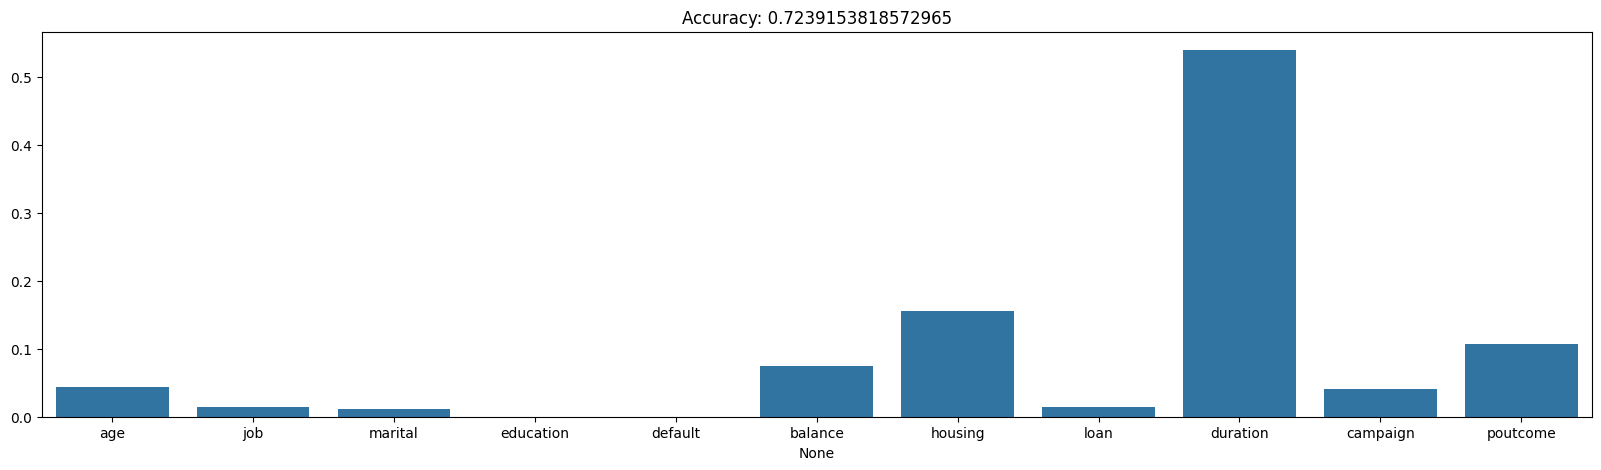

In [ ]:
plt.figure(figsize=(20, 5))
fi = pd.Series(decision_tree.feature_importances_, index=x.columns[:])
sns.barplot(x=fi.index, y=fi.values)
score = decision_tree.score(x_test, y_test)
plt.title('Accuracy: ' + str(score))
plt.show()

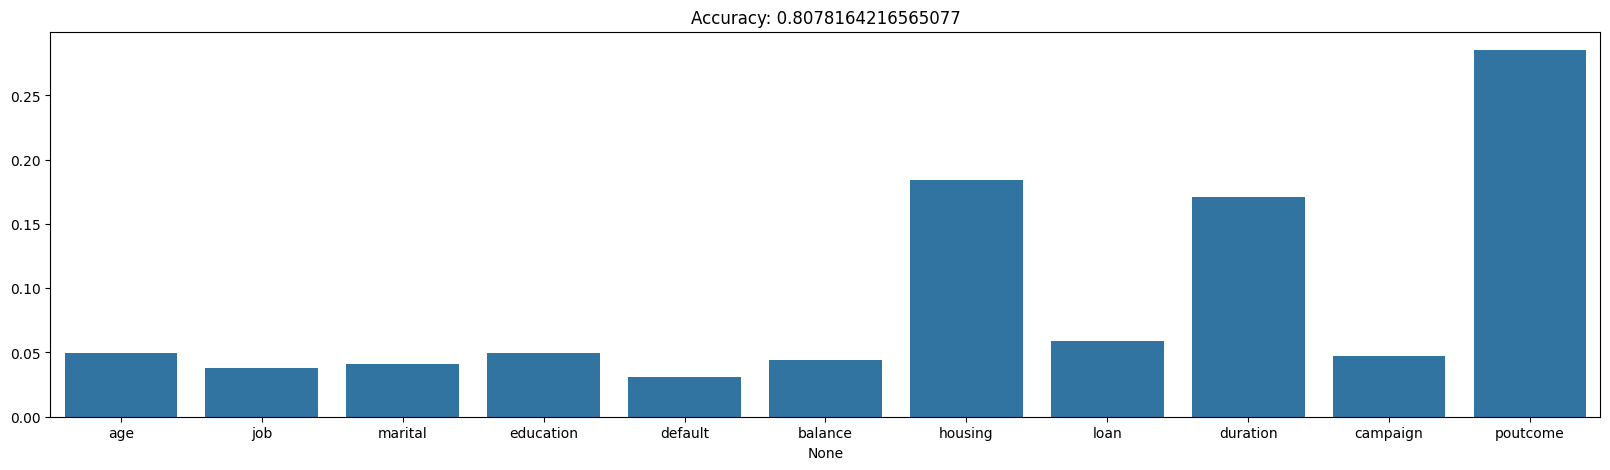

In [ ]:
plt.figure(figsize=(20, 5))
fi = pd.Series(xgboost.feature_importances_, index=x.columns[:])
sns.barplot(y=fi.values, x=fi.index)
score = xgboost.score(x_test, y_test)
plt.title('Accuracy: ' + str(score))
plt.show()